In [33]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import warnings

[*********************100%***********************]  1 of 1 completed


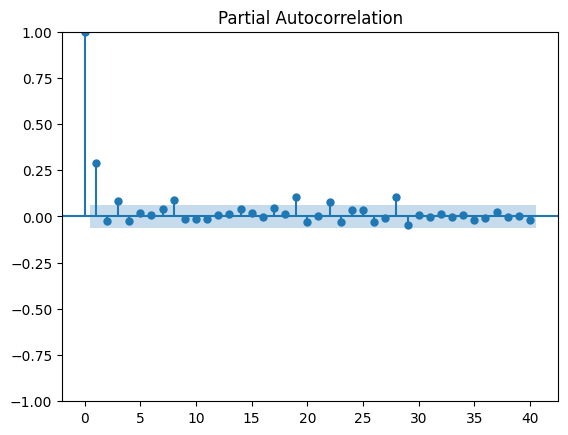

In [43]:
nifty_data = yf.download('^NSEI', start='2020-07-01', end='2024-07-01')
nifty_data['Return'] = nifty_data['Adj Close'].pct_change()
nifty_data = nifty_data.dropna()
nifty_data['Squared Return'] = nifty_data['Return']**2
plot_pacf(nifty_data['Squared Return'], lags=40)
plt.show()

calcualting orders from 1 to 30 to see minimum AIC

In [44]:
aics=[]
orders=range(1,31)
warnings.filterwarnings("ignore")
for order in orders:
    model=arch_model(nifty_data['Return'],vol='ARCH',p=order)
    fitted=model.fit()
    aics.append(fitted.aic)
aics    

Iteration:      1,   Func. Count:      5,   Neg. LLF: 53344267.13203213
Iteration:      2,   Func. Count:     16,   Neg. LLF: 86.18205746414198
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3244.802280320274
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 22459977427.765408
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2328055573.340724
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1312.718091517004
Iteration:      4,   Func. Count:     38,   Neg. LLF: 858.8497505570974
Iteration:      5,   Func. Count:     47,   Neg. LLF: -1167.4572671156202
Iteration:      6,   Func. Count:     56,   Neg. LLF: -771.6099458427825
Iteration:      7,   Func. Count:     65,   Neg. LLF: 695392.0030910566
Iteration:      8,   Func. Count:     72,   Neg. LLF: -3047.635719983301
Iteration:      9,   Func. Count:     79,   Neg. LLF: -3207.3259921

[-6483.604560640548,
 -6494.577373617329,
 -6503.360921623637,
 -6502.219622363073,
 -6501.431524754609,
 -6503.432701654452,
 -6508.554018016115,
 -6515.282672603447,
 -6510.954242918519,
 -6503.475238538226,
 -6495.760595426711,
 -6495.846009148743,
 -6483.857014066738,
 -6483.874715274429,
 -6482.282496060287,
 -6480.131551743408,
 -6483.795858964023,
 -6484.923003077894,
 -6513.603104379572,
 -6509.940357590522,
 -6508.212965644458,
 -6488.582601815278,
 -6485.913205413015,
 -6480.617503666264,
 -6484.9893644693375,
 -6493.583549845489,
 -6504.383201026838,
 -6480.502732458293,
 -6474.633315860201,
 -6475.1928560137085]

Text(0, 0.5, 'AIC')

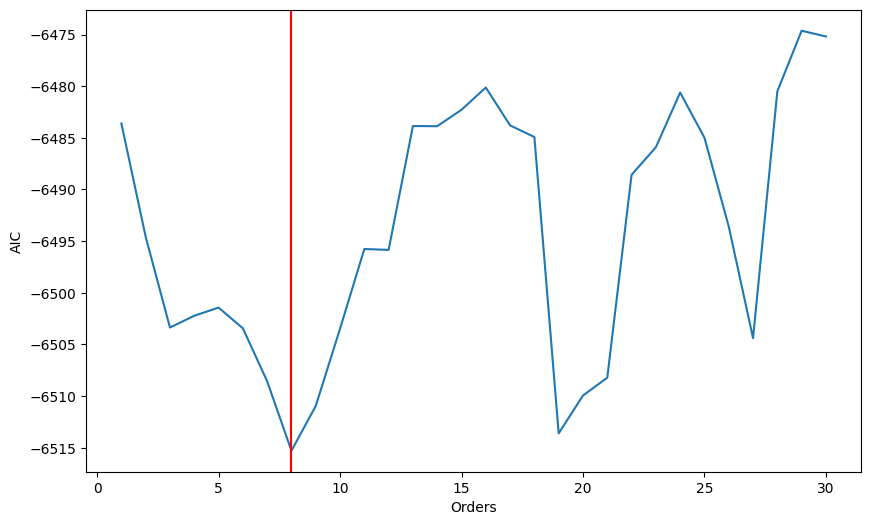

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(orders, aics, label='AIC')
plt.axvline(x=8,color='red')
plt.xlabel('Orders')
plt.ylabel('AIC')

minima occurs at 3 so order can be taken as 3

In [54]:
nifty_data.head()
arch_model_fitted = arch_model(nifty_data['Return'], vol='ARCH', p=8).fit(disp='off')
#arch_model_fitted.summary()
nifty_data['Volatility']=arch_model_fitted.conditional_volatility
nifty_data['Benchmark Vol']=nifty_data['Squared Return'].shift(-1)
nifty_data.head()
rmse = np.sqrt(((nifty_data['Volatility'] - nifty_data['Benchmark Vol'])**2).mean())
rmse

0.009384663904410742

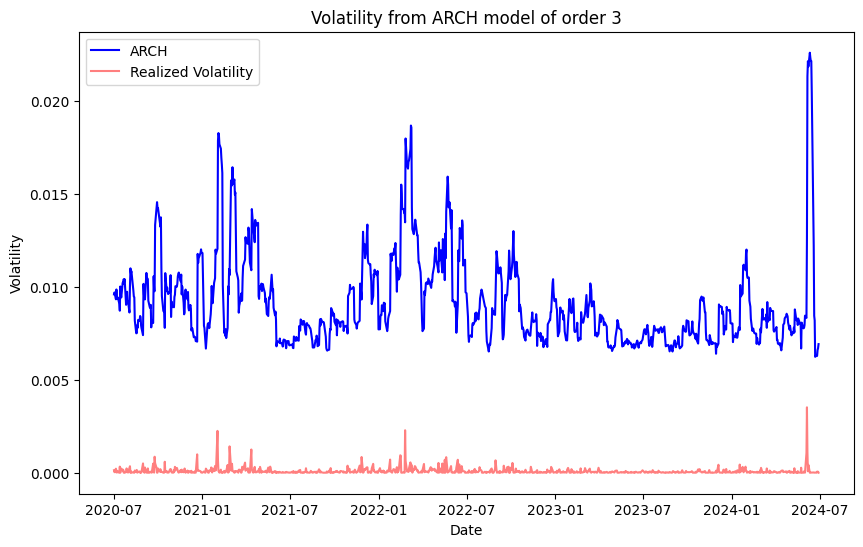

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(nifty_data.index, nifty_data['Volatility'], color='blue', label='ARCH')
plt.plot(nifty_data.index, nifty_data['Squared Return'], color='red', alpha=0.5, label='Realized Volatility')
plt.title('Volatility from ARCH model of order 3')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()